In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45
from scipy.integrate import solve_ivp

In [21]:
teval = np.linspace(1.0e-6, 35, 1000)

In [22]:
n=[0.0, 0.5, 1.0000001, 1.5, 2.0001, 2.5, 3.000001, 3.5, 4.00001, 4.5, 5]
x=[0 for i in range (len(n))]
y1=[0 for i in range (len(n))]
y2=[0 for i in range (len(n))]
C_0 = [1.0, 0]

#Eq system def:
for i in range(len(n)):
    def LE(t,y):
        f1 = -(2.0/t)*y[1]-y[0]**n[i]
        f2 = y[1]
        return [f2, f1]   
    sol = solve_ivp(LE, [1.0e-6, 50], C_0, method='RK45', t_eval=teval, )  #Solving:
    x[i] = sol.t
    y1[i] = sol.y[0]
    y2[i] = sol.y[1]

<ipython-input-22-2c3186d598da>:10: RuntimeWarning: invalid value encountered in double_scalars
  f1 = -(2.0/t)*y[1]-y[0]**n[i]


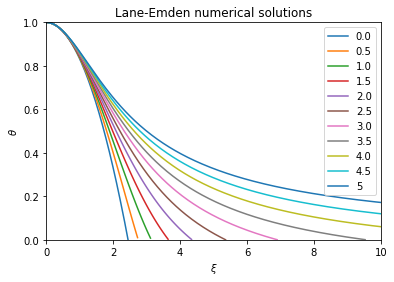

In [23]:
fig, ax = plt.subplots()
for i in range(len(n)):
    if n[i]!=1:
            tag=str(n[i])
            ax.plot(x[i], y1[i], label=tag[:3])
    else:
        xaux = [x[2][i] for i in range (90)]
        yaux = [y1[2][i] for i in range (90)]
ax.set_ylabel(r'$\theta$')
ax.set_xlabel(r'$\xi$')
plt.ylim(0,1)
plt.xlim(0,10)
plt.legend()
plt.title('Lane-Emden numerical solutions')
plt.savefig('polytropic_comparison.png', dpi=300)

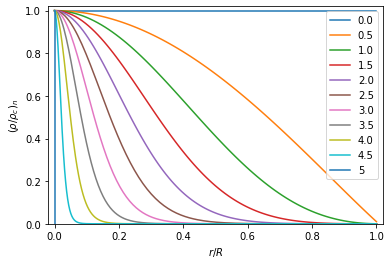

In [24]:
fig, ax = plt.subplots()
for i in range(len(n)):
    if n[i]==5:
            tag=str(n[i])
            ax.plot(x[i]*0, y1[i]**i, label=tag[:3])                #chi_1 is infinite for n=5
    else: 
        if n[i]!=1:
            tag=str(n[i])
            ax.plot((x[i]/(x[i][-1])), y1[i]**i, label=tag[:3])

ax.set_ylabel(r'$\left(\rho/\rho_c\right)_{n}$')
ax.set_xlabel(r'$r/R$')
plt.ylim(0,1.02)
plt.xlim(-0.02,1.02)
plt.legend()
plt.savefig('theta_rad.png', dpi=300)

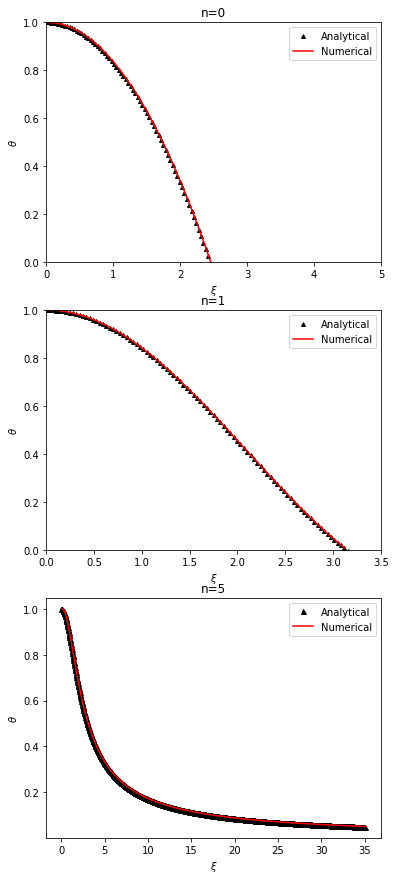

In [26]:
fig, ax = plt.subplots(3,1, figsize = (6,15))

yn0 = [1-(1/6.0)*teval[i]**2 for i in range (len(teval))]

ax[0].plot(teval,yn0,"k^",ms=4,label='Analytical')
ax[0].plot(x[0]+0.01,y1[0],"r", label='Numerical')
ax[0].legend()
ax[0].set_title('n=0')
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,5)
ax[0].set_ylabel(r'$\theta$')
ax[0].set_xlabel(r'$\xi$')


yn5 = [1/(np.sqrt(1+teval[i]**2/3)) for i in range (len(teval))]

ax[2].plot(teval,yn5,"k^",ms=5,label='Analytical')
ax[2].plot(x[10]+0.1, y1[10],"r",label='Numerical')
ax[2].legend()
ax[2].set_title('n=5')
ax[2].set_ylabel(r'$\theta$')
ax[2].set_xlabel(r'$\xi$')


yn1 = [np.sin(teval[i])/teval[i] for i in range (len(teval))]

ax[1].plot(teval,yn1,"k^",ms=4,label='Analytical')
ax[1].plot(x[2], y1[2]+0.001,"r",label='Numerical')
ax[1].legend()
ax[1].set_title('n=1')
ax[1].set_ylabel(r'$\theta$')
ax[1].set_xlabel(r'$\xi$')
ax[1].set_xlim(0,3.5)
ax[1].set_ylim(0,1)
plt.savefig('comparison.png',dpi=300)

In [27]:
xipfin = [y2[i][len(y2[i])-1] for i in range (11)]

Rn = [x[i][len(x[i])-1] for i in range (11)]
Dn = [(-(3/Rn[i])*xipfin[i])**-1 for i in range (11)]
Mn = [-Rn[i]**2*xipfin[i] for i in range (11)]
print(Rn)

[35.0, 2.732733654654655, 3.1181190290290295, 3.6436445395395403, 4.344345220220221, 5.360361207207208, 6.901902704704706, 9.529530257257258, 15.030030600600602, 32.582582651651656, 35.0]


In [28]:
alphc1 = np.sqrt((2.5*3.15e6)/(4*np.pi*6.67e-11*5.0e9**(1/3)))
alphc2 = np.sqrt((2.5*3.15e6)/(4*np.pi*6.67e-11*1.0e9**(1/3)))
print(alphc1,alphc2)

2344026.037564689 3065190.2275062264


In [29]:
M1 = [-4*np.pi*alphc1**3*5.0e9*x[3][i]**2*y2[3][i] for i in range (len(x[3]))]
M2 = [-4*np.pi*alphc2**3*1.0e9*x[3][i]**2*y2[3][i] for i in range (len(x[3]))]
R1 = [alphc1*x[3][i] for i in range (len(x[3]))]
R2 = [alphc2*x[3][i] for i in range (len(x[3]))]
den1 = [5.0e9*y1[3][i]**1.5 for i in range (len(x[3]))]
den2 = [1.0e9*y1[3][i]**1.5 for i in range (len(x[3]))]

M1sol = [M1[i]/1.989e30 for i in range (len(M1))]
M2sol = [M2[i]/1.989e30 for i in range (len(M2))]
R1sol = [R1[i]/6.597e8 for i in range (len(R1))]
R2sol = [R2[i]/6.597e8 for i in range (len(R1))]

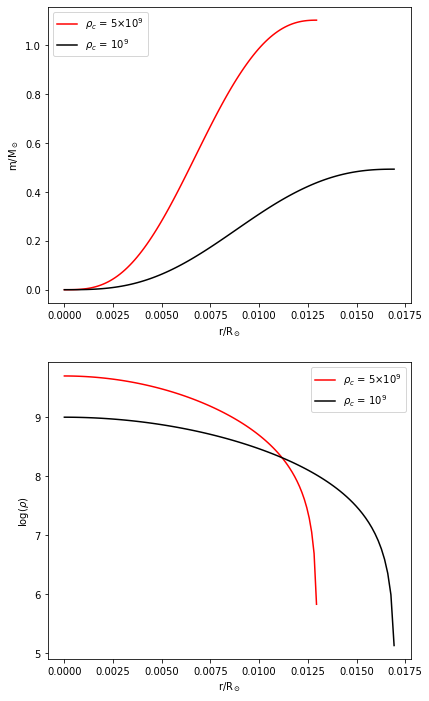

In [30]:
fig, ax = plt.subplots(2,1, figsize = (6.5,12))

ax[0].plot(R1sol, M1sol,'r', label=r'$\rho_c$ = 5$\times$10$^9$')
ax[0].plot(R2sol, M2sol,'k', label=r'$\rho_c$ = 10$^9$')
ax[0].set_xlabel(r'r/R$_\odot$')
ax[0].set_ylabel(r'm/M$_\odot$')
ax[0].legend()

ax[1].plot(R1sol, np.log10(den1),'r', label=r'$\rho_c$ = 5$\times$10$^9$')
ax[1].plot(R2sol, np.log10(den2),'k', label=r'$\rho_c$ = 10$^9$ ')
ax[1].legend()
ax[1].set_xlabel(r'r/R$_\odot$')
ax[1].set_ylabel(r'log($\rho$)')

plt.savefig('rho_mass_radius.png')


In [31]:
print( 'M1', M1sol[-1], 'M2', M2sol[-1])
print( 'R1', R1sol[-1], 'R2', R2sol[-1])

M1 1.1032502398741584 M2 0.4933885065103134
R1 0.012946487300759564 R2 0.016929609875857243
